# Arcsine Laws

In this analysis, we'll explore the <i>Arcsine laws</i> numerically. The Arcsine laws are a number of results for random walks that relate path properties of the simple symmetric random walk to the <i>arcsine distribution</i>. 

A random variable $X$ on $[0,1]$ is arcsine-distributed if the cumulative distribution function is given by...
$$ \mathbb{P}[X \leq x] = \frac{2}{\pi} \arcsin(\sqrt{x}) $$
for all $0 \leq x \leq 1$ and the probability density function is given by...
$$ f_X(x) = \frac{1}{\pi \sqrt{x(1-x)}}$$
on $(0,1)$.

Given a <b>simple symmetric random walk</b> $(S_n)_{n\geq 0}$ with $S_0 =0$, let's define the random variables $C_{2N}$, $L_{2N}$, and $M_{2N}$ to be...
* The total number of periods from $0$ to $2N$ the random walk spends above zero: 

$$C_{2N}:= \vert \{ n \in \{ 1,\dots , 2N \} : S_n > 0 \}\vert. $$

* The time of the last visit to $0$ before time $2N$: 

$$L_{2N}:= \max \{ 0 \leq n \leq  2N : S_n = 0 \}.$$

* The time when the random walk reaches its unique maximum value between time $0$ and $2N$: 

$$M_{2N}:= \operatorname{argmax} \{ S_n : 0 \leq n \leq 2N \} \quad (\text{this notation means that } S_{M_{2N}} = \max \{ S_n : 0 \leq n \leq 2N \})$$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import arcsine
%matplotlib inline

## Random Walk Simulation

First, we'll write a function to simulate one path of a simple symmetric random walk with $2N$ time steps (i.e. lengthOfRandomWalk = $2N$), starting at $S_0=0$.

The function <tt>randomWalk</tt> will return an array of length 2N with the entire path of the random walk.

In [2]:
def randomWalk(lengthOfRandomWalk):
    n = lengthOfRandomWalk
    sn = 0
    samplePath = [sn]
    for i in range(1,n):
        xi = np.random.randint(0,2)
        sn += 1 if xi == 1 else -1
        samplePath.append(sn)
    return samplePath

## Calculating Our Random Variables

We'll now write three functions which take a path of a random walk as an input and compute the values of the random variables $C_{2N}, L_{2N}, M_{2N}$, respectively.

In [3]:
def timeAboveZero(path):
    result = 0
    for x in path:
        if x > 0: result += 1
    return result

In [4]:
def timeOfLastVisitOfZero(path):
    for x in range(0,len(path)):
        if path[x] == 0: result = x
    return result

In [5]:
def timeHitMax(path):
    tempMax = np.amax(path)
    result = path.index(tempMax)
    return result

## Simulating Our Random Variables

From random walk theory, we're provided the following asymptotic statements...

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{C_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{L_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

$$\lim_{N\rightarrow \infty} \mathbb{P} \left[ \frac{M_{2N}}{2N} \leq x\right] =\frac{2}{\pi} \arcsin(\sqrt{x})$$

From above, we say that the random variables $C_{2N}/2N, L_{2N}/2N, M_{2N}/2N$ converge in distribution to the Arcsine Distribution.

An interesting property about the Arcsine distribution is that its density is <i>U-shaped</i> on $(0,1)$. In other words, if $X$ is arcsine-distributed on $(0,1)$, the probabilty that $X$ takes very small values near 0 or very large values near 1 is rather high, but the probability for taking values around 0.5 is low. 

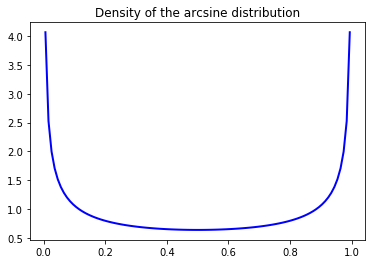

In [6]:
x = np.linspace(arcsine.ppf(0.05), arcsine.ppf(0.95), 100)
plt.title("Density of the arcsine distribution")
plt.plot(x, arcsine.pdf(x), linewidth=2, color='b')

For $2N = 1000$, we'll sample 10,000 realisations of each of the random variables $C_{2N}/2N, L_{2N}/2N,$ and $M_{2N}/2N$, respectively.

We'll display a normalized histogram for all three simulations, along with the probability density function of the arcsine distribution to check our asymptotic statements numerically.

In [7]:
def rwSim(N):
    aboveZeros = []
    lastZeros = []
    maxTimes = []
    for i in range(N):
        rw = randomWalk(1000)
        aboveZeros.append(timeAboveZero(rw)/1000)
        lastZeros.append(timeOfLastVisitOfZero(rw)/1000)
        maxTimes.append(timeHitMax(rw)/1000)
    return aboveZeros,lastZeros,maxTimes

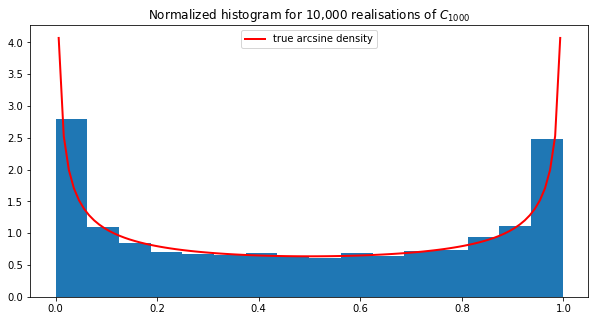

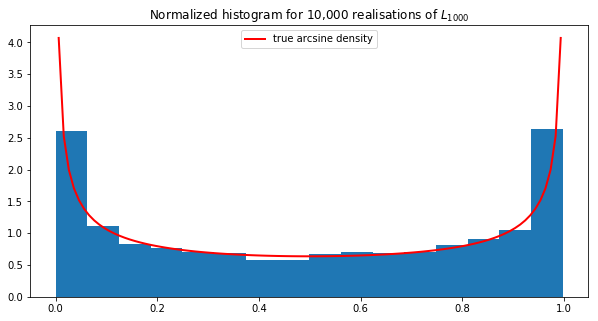

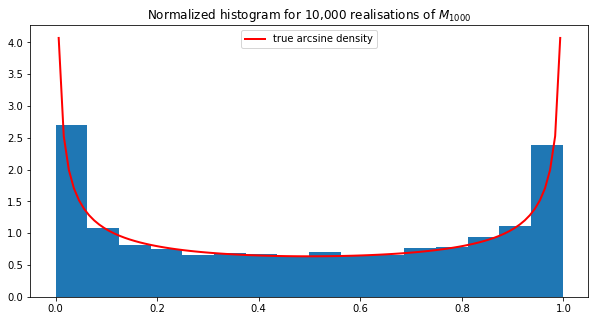

In [9]:
sim = rwSim(10000)
aboveZeros = sim[0]
lastZeros = sim[1]
maxTimes = sim[2]

c = aboveZeros
plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10,000 realisations of $C_{1000}$")
plt.hist(c, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()

l = lastZeros
plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10,000 realisations of $L_{1000}$")
plt.hist(l, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()

m = maxTimes
plt.figure(figsize=(10,5))
plt.title("Normalized histogram for 10,000 realisations of $M_{1000}$")
plt.hist(m, bins='auto', density='True')
plt.plot(x, arcsine.pdf(x), linewidth=2, color='r', label="true arcsine density")
plt.legend()